##  import

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
# Add src to path
sys.path.append('../src')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Stratified Sampling

In [6]:
from sampling import create_stratified_sample

# Create stratified sample
sample_df = create_stratified_sample(
    input_file="../data/processed/complaints.csv",
    output_file="../data/processed/sample_complaints.csv",
    sample_size=12000,
    random_state=42
)




Loading data from ../data/processed/complaints.csv...


c:\Users\user\Desktop\Project\complaint-chatbot\notebooks\../src\sampling.py:32: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)



Original dataset shape: (9609797, 18)

Product distribution in original dataset:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service       

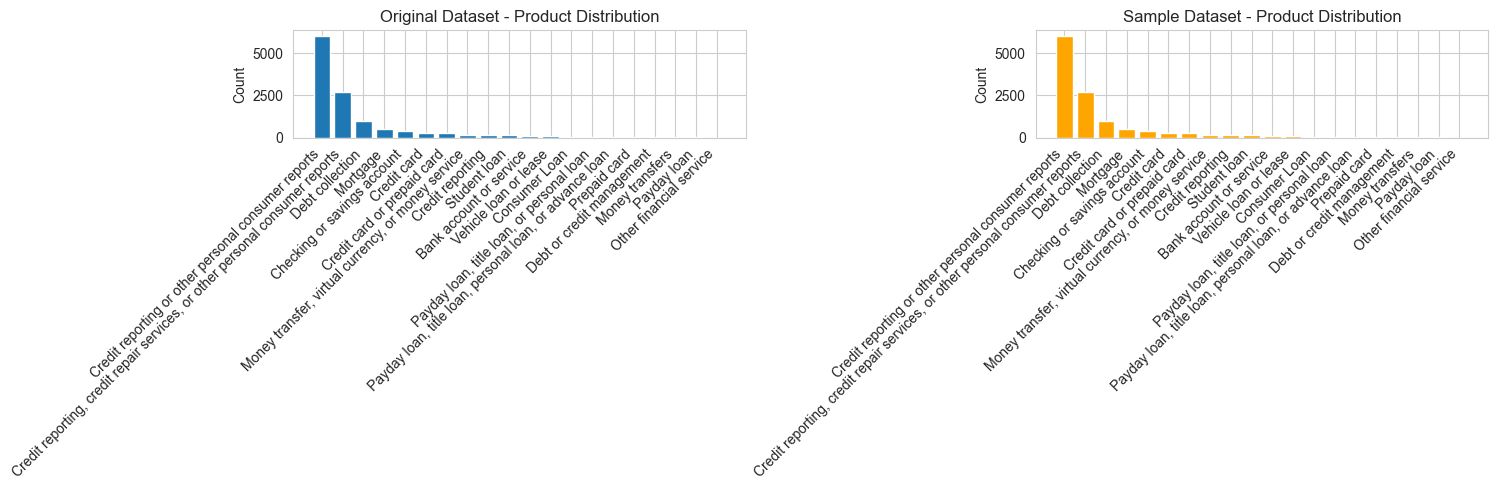


Proportional representation check:

Original proportions (%):
Product
Credit reporting or other personal consumer reports                             50.38
Credit reporting, credit repair services, or other personal consumer reports    22.52
Debt collection                                                                  8.31
Mortgage                                                                         4.39
Checking or savings account                                                      3.02
Credit card                                                                      2.36
Credit card or prepaid card                                                      2.14
Money transfer, virtual currency, or money service                               1.51
Credit reporting                                                                 1.46
Student loan                                                                     1.14
Bank account or service                                              

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original dataset
original_df = pd.read_csv(r"C:\Users\user\Desktop\Project\complaint-chatbot\data\processed\sample_complaints.csv")

# If sample_df already exists from previous stratified sampling, keep it
# Otherwise, create it using your create_stratified_sample function

# Count product occurrences
original_counts = original_df['Product'].value_counts()
sample_counts = sample_df['Product'].value_counts()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original dataset
axes[0].bar(range(len(original_counts)), original_counts.values)
axes[0].set_xticks(range(len(original_counts)))
axes[0].set_xticklabels(original_counts.index, rotation=45, ha='right')
axes[0].set_title('Original Dataset - Product Distribution')
axes[0].set_ylabel('Count')

# Sample dataset
axes[1].bar(range(len(sample_counts)), sample_counts.values, color='orange')
axes[1].set_xticks(range(len(sample_counts)))
axes[1].set_xticklabels(sample_counts.index, rotation=45, ha='right')
axes[1].set_title('Sample Dataset - Product Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
# Proportional representation check
print("\nProportional representation check:")

print("\nOriginal proportions (%):")
print((original_df['Product'].value_counts(normalize=True) * 100).round(2))

print("\nSample proportions (%):")
print((sample_df['Product'].value_counts(normalize=True) * 100).round(2))


In [39]:
# Add src to path

from chunking import create_text_chunks, analyze_chunks, save_chunks

# Create text chunks
chunks_data = create_text_chunks(
    df=sample_df,
    chunk_size=500,
    chunk_overlap=50,
    text_column="Consumer complaint narrative"
)

# Analyze chunks
analyze_chunks(chunks_data)

# Save chunks
save_chunks(chunks_data, "../data/processed/sample_chunks.csv")
    

Initializing text splitter with chunk_size=500, overlap=50

Processing 12000 complaints...
Processed 2000 complaints, generated 1764 chunks
Processed 4000 complaints, generated 3803 chunks
Processed 6000 complaints, generated 5741 chunks
Processed 7000 complaints, generated 6584 chunks

Chunking complete!
Total complaints processed: 12000
Total chunks generated: 11169
Average chunks per complaint: 0.93

CHUNKING ANALYSIS

Chunk length statistics:
  Mean: 329.94 characters
  Median: 354.00 characters
  Min: 1 characters
  Max: 500 characters
  Std: 128.81 characters

Chunks per complaint:
  Average: 3.00
  Total unique complaints: 3721

Chunks per product category:
  Credit reporting or other personal consumer reports: 3857 (34.53%)
  Credit reporting, credit repair services, or other personal consumer reports: 2788 (24.96%)
  Debt collection: 1110 (9.94%)
  Mortgage: 829 (7.42%)
  Checking or savings account: 605 (5.42%)
  Credit card or prepaid card: 432 (3.87%)
  Money transfer, virt

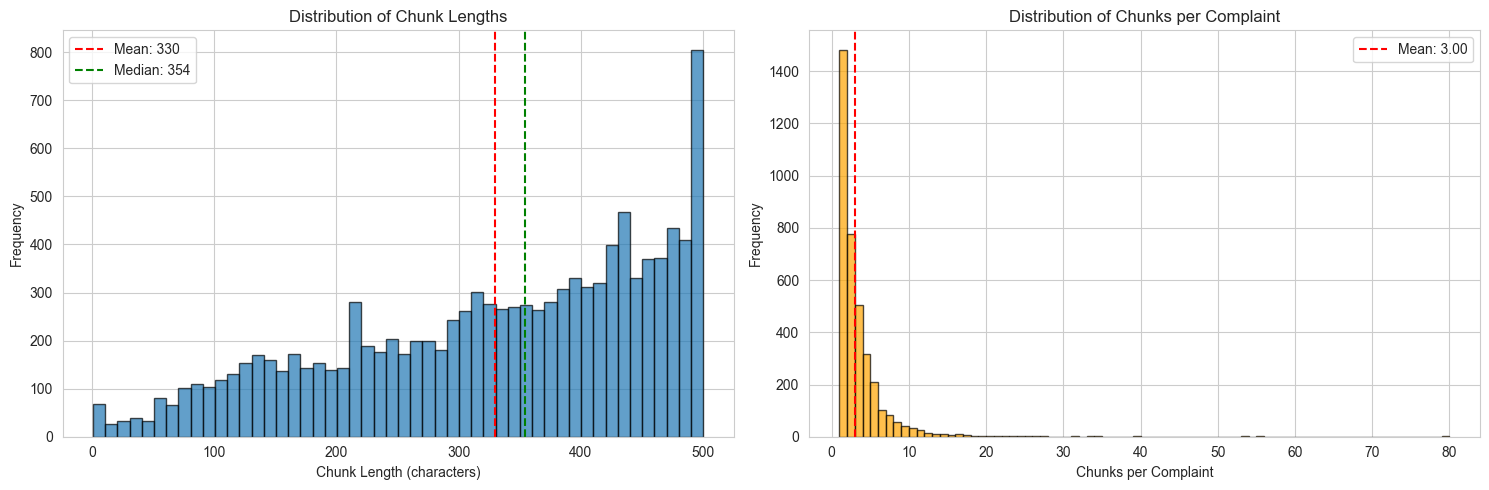

In [41]:
# Visualize chunk statistics
chunk_lengths = [len(chunk['text']) for chunk in chunks_data]
chunks_per_complaint = {}
for chunk in chunks_data:
    cid = chunk['complaint_id']
    chunks_per_complaint[cid] = chunk['total_chunks']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chunk length distribution
axes[0].hist(chunk_lengths, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(chunk_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(chunk_lengths):.0f}')
axes[0].axvline(np.median(chunk_lengths), color='green', linestyle='--', label=f'Median: {np.median(chunk_lengths):.0f}')
axes[0].set_xlabel('Chunk Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Chunk Lengths')
axes[0].legend()

# Chunks per complaint distribution
chunks_counts = list(chunks_per_complaint.values())
axes[1].hist(chunks_counts, bins=range(1, max(chunks_counts)+2), edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(np.mean(chunks_counts), color='red', linestyle='--', label=f'Mean: {np.mean(chunks_counts):.2f}')
axes[1].set_xlabel('Chunks per Complaint')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Chunks per Complaint')
axes[1].legend()

plt.tight_layout()
plt.show()

In [43]:
from embedding import generate_embeddings, analyze_embeddings, save_embeddings

# Generate embeddings
embeddings, chunks_df = generate_embeddings(
    chunks_file="../data/processed/sample_chunks.csv",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    batch_size=32
)

# Analyze embeddings
analyze_embeddings(embeddings)

# Save embeddings
save_embeddings(embeddings, chunks_df, "../data/processed/sample_embeddings.npy")

Loading chunks from ../data/processed/sample_chunks.csv...
Total chunks to embed: 11169

Loading embedding model: sentence-transformers/all-MiniLM-L6-v2
Model loaded. Embedding dimension: 384

Generating embeddings with batch_size=32...


Batches: 100%|██████████| 350/350 [09:12<00:00,  1.58s/it]



Embedding generation complete!
Time taken: 553.49 seconds
Embeddings per second: 20.18
Embeddings shape: (11169, 384)

EMBEDDING ANALYSIS

Embedding statistics:
  Shape: (11169, 384)
  Dimension: 384
  Mean: -0.000586
  Std: 0.051028
  Min: -0.256122
  Max: 0.259109

Embedding norms:
  Mean norm: 1.000000
  Std norm: 0.000000
  Min norm: 1.000000
  Max norm: 1.000000

Memory usage: 16.36 MB

Embeddings saved to ../data/processed/sample_embeddings.npy
File size: 16.36 MB
Metadata saved to ../data/processed/sample_embeddings_metadata.csv


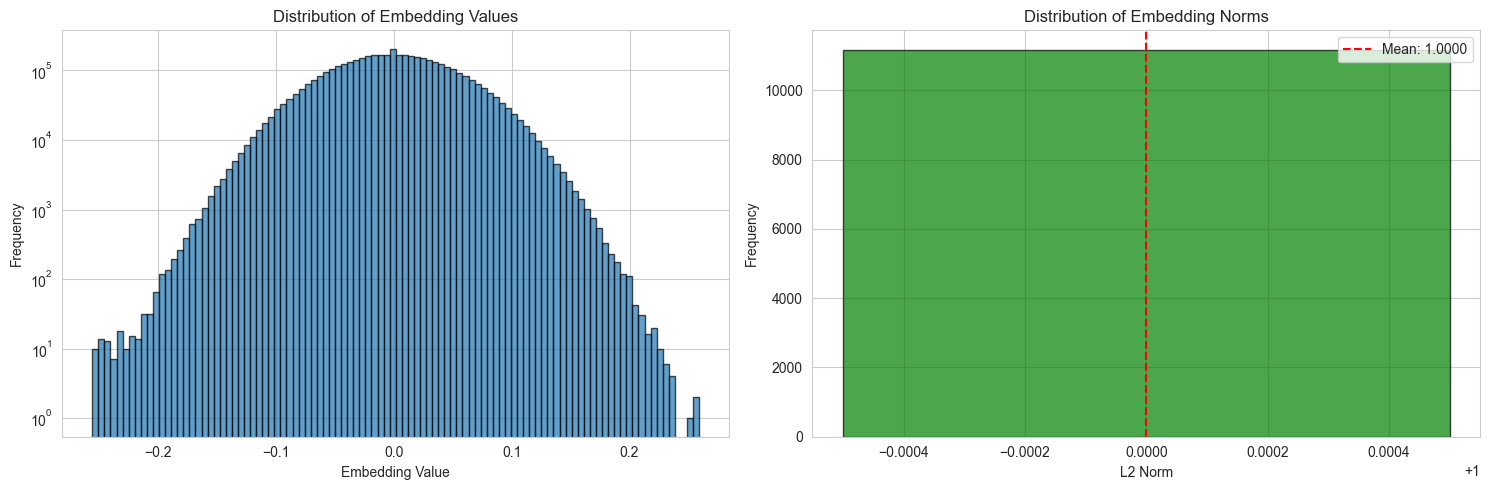

In [49]:
# Visualize embedding statistics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Embedding value distribution
axes[0].hist(embeddings.flatten(), bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Embedding Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Embedding Values')
axes[0].set_yscale('log')

# Embedding norms
norms = np.linalg.norm(embeddings, axis=1)
# Check if norms have sufficient variance for histogram
if np.std(norms) > 1e-6:
    axes[1].hist(norms, bins=min(10, len(np.unique(norms))), edgecolor='black', alpha=0.7, color='green')
else:
    # If norms are essentially constant, just show a single bar
    axes[1].bar([np.mean(norms)], [len(norms)], width=0.001, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(np.mean(norms), color='red', linestyle='--', label=f'Mean: {np.mean(norms):.4f}')
axes[1].set_xlabel('L2 Norm')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Embedding Norms')
axes[1].legend()

plt.tight_layout()
plt.show()

##  FAISS Vector Store

In [53]:
from vector_store_builder import build_vector_store, test_vector_store

# Build vector store
store = build_vector_store(
    embeddings_file="../data/processed/sample_embeddings.npy",
    metadata_file="../data/processed/sample_chunks.csv",
    output_dir="../vector_store/faiss_index",
    index_type="flat"
)

# Test vector store
test_vector_store(store)

Loading embeddings from ../data/processed/sample_embeddings.npy...
Loading metadata from ../data/processed/sample_chunks.csv...

Embeddings shape: (11169, 384)
Metadata records: 11169
Building FAISS index with 11169 vectors...
Index built successfully!
  Index type: flat
  Total vectors: 11169
  Dimension: 384

Vector store saved to ../vector_store/faiss_index
  Index file: ..\vector_store\faiss_index\faiss.index
  Metadata file: ..\vector_store\faiss_index\metadata.pkl

VECTOR STORE TESTING

Query 1: 'I was charged unauthorized fees on my credit card'

Result 1:
  Similarity: 0.7300
  Product: Checking or savings account
  Issue: Problem with a lender or other company charging your account
  Company: JPMORGAN CHASE & CO.
  Text: I used my card on their site. Then charges started coming back to back to back for days and I requested charges. Be stopped and refunded. Cant get in touch with anyone cause theres no Number and email...

Result 2:
  Similarity: 0.7096
  Product: Checking or s

##  Interactive Testing

In [51]:
from vector_store_builder import FAISSVectorStore

# Load the vector store
store = FAISSVectorStore.load("../vector_store/faiss_index")
store.load_model()

# Custom query
query = "I want to dispute fraudulent charges on my account"
results = store.query(query, k=5)

print(f"Query: '{query}'\n")
print("="*80)

for i, result in enumerate(results, 1):
    print(f"\nResult {i}:")
    print(f"  Similarity: {result['similarity']:.4f}")
    print(f"  Product: {result.get('product_category', 'N/A')}")
    print(f"  Issue: {result.get('issue', 'N/A')}")
    print(f"  Company: {result.get('company', 'N/A')}")
    print(f"  State: {result.get('state', 'N/A')}")
    print(f"  Text: {result.get('text', '')[:300]}...")

Vector store loaded from ../vector_store/faiss_index
  Total vectors: 11169
Query: 'I want to dispute fraudulent charges on my account'


Result 1:
  Similarity: 0.7302
  Product: Credit reporting, credit repair services, or other personal consumer reports
  Issue: Incorrect information on your report
  Company: TRANSUNION INTERMEDIATE HOLDINGS, INC.
  State: CA
  Text: To : Whom It May concern : I am writing to dispute a fraudulent charge on my account in the amount of {$0.00}, {$1300.00}, {$5700.00}, {$220.00}, {$3600.00}....

Result 2:
  Similarity: 0.7167
  Product: Credit reporting, credit repair services, or other personal consumer reports
  Issue: Incorrect information on your report
  Company: EQUIFAX, INC.
  State: CO
  Text: To : Whom It May concern : I am writing to dispute a fraudulent charge on my account in the amount of {$22000.00}, {$22000.00}....

Result 3:
  Similarity: 0.7158
  Product: Credit reporting or other personal consumer reports
  Issue: Incorrect informatio

In [52]:
# Test with metadata filtering
query = "problems with online banking"
results = store.query(query, k=5, filter_metadata={'product_category': 'Checking or savings account'})

print(f"Query: '{query}'")
print(f"Filter: Product = 'Checking or savings account'\n")
print("="*80)

for i, result in enumerate(results, 1):
    print(f"\nResult {i}:")
    print(f"  Similarity: {result['similarity']:.4f}")
    print(f"  Product: {result.get('product_category', 'N/A')}")
    print(f"  Issue: {result.get('issue', 'N/A')}")
    print(f"  Text: {result.get('text', '')[:200]}...")
    print("-"*80)

Query: 'problems with online banking'
Filter: Product = 'Checking or savings account'


Result 1:
  Similarity: 0.5909
  Product: Checking or savings account
  Issue: Managing an account
  Text: . My complaint is that the bank should have verified with me before transferring money from my money market account to my checking, none of which I authorized. I never use on-line banking and have bee...
--------------------------------------------------------------------------------

Result 2:
  Similarity: 0.5691
  Product: Checking or savings account
  Issue: Managing an account
  Text: I have XXXX accounts with Truist Bank, Formerly Suntrust Bank. XXXX is a mortgage the other is a checking account. During the merger I can no longer access my checking account online. My mortgage acco...
--------------------------------------------------------------------------------

Result 3:
  Similarity: 0.5406
  Product: Checking or savings account
  Issue: Managing an account
  Text: There was an unauth